# todo
- Effect of Vcom? 
This only needs to be taekn into account when tranforming to another reference frame.
The BFE only needs the position of the COM not the velocity

- Try with a higher resolution simulation.

In [1]:
%pylab inline
import sys
from scipy.interpolate import interp1d
sys.path.append('../../MW-LMC-SCF/code/')
from coefficients_smoothing import get_coefficients
import coefficients_smoothing
import linecache


Populating the interactive namespace from numpy and matplotlib


In [2]:
import gala.potential as gp
import gala.integrate as gi
from gala.units import UnitSystem
import gala.dynamics as gd
import astropy.units as u

In [3]:
# coeff_path = '../data/coefficients/MW_halo/BFE_MW2_test_1M_snap_host_snap'
coeff_path = '../../time-dependent-BFE/data/MW_halo/BFE_MW2_10M_halo_vir_host_snap'
coeff_path_LR = '../data/coefficients/MW_halo/BFE_MW2_test_1M_snap_host_snap'

In [176]:
# Variables definitions


snap1 = 0
snap2 = 237
snap3 = 251

dt = 0.02
init_time= snap1*dt
max_time_HR = snap2*dt
max_time_LR = snap3*dt

# coefficients masses
m_mw1 = 0.0000186
m_mw2 = 0.00186

# halo scale length
rs_halo = 34.51

sn_cut = 5
nmax_HR = 20
lmax_HR = 20

In [177]:
def get_coefficients(path, n_snaps, sn_cut, m, nmax, lmax):
    S_matrix = np.zeros((n_snaps, nmax+1, lmax+1, lmax+1))
    T_matrix = np.zeros((n_snaps, nmax+1, lmax+1, lmax+1))
    
    for i in range(n_snaps):
        covcoeff = coefficients_smoothing.read_coeffcov_matrix(path, n_snaps, nmax, lmax , lmax, i)
        S = covcoeff[0]
        T = covcoeff[1]
        SS = covcoeff[2]
        TT = covcoeff[3]
        ST = covcoeff[4]
        S_matrix[i], T_matrix[i], N = coefficients_smoothing.smooth_coeff_matrix(S, T, SS, TT, ST, m, 
                                                                                 nmax, lmax, lmax, sn_cut, sn_out=0)
    return S_matrix, T_matrix

In [183]:
S_all_HR, T_all_HR = get_coefficients(coeff_path, snap2, sn_cut, m_mw1, nmax_HR, lmax_HR)

/home/ngc/Work/research/BFE_integrator/notebooks/../../MW-LMC-SCF/code/coefficients_smoothing.py:128: RuntimeWarning: invalid value encountered in double_scalars
  bt = 1 / (1 + (varT/T**2))


In [184]:
shape(S_all_HR)

(237, 21, 21, 21)

In [179]:
np.savetxt('../data/coefficients/MW2_10M_test_halo_sn_5.txt', np.array([S_all_HR.flatten(), T_all_HR.flatten()]).T)

In [185]:
S, T = loadtxt('../data/coefficients/MW2_10M_test_halo_sn_5.txt', unpack=True)

In [186]:
S_all_HR = S.reshape((237, 21, 21, 21))
T_all_HR = T.reshape((237, 21, 21, 21))

In [7]:
#snap1 = 0
#snap2 = 236
dt2 = 0.1
#init_time= snap1*dt
#max_time = snap2*dt
#sn_cut = 5
#m_mw = 0.0000186
#rs_halo = 34.51

In [8]:
#t_Lint = np.arange(0, 48*0.1, 0.1)
#print(len(t_Lint))
#t = np.arange(0, 236*0.02, 0.02)
#t2 = np.arange(0, 251*0.02, 0.02)

In [10]:
S_all_HR_Lint = np.zeros((48, 21, 21, 21))
T_all_HR_Lint = np.zeros((48, 21, 21, 21))
j=0
for i in range(0, snap2, 5):
    covcoeff = coefficients_smoothing.read_coeffcov_matrix(coeff_path, snap2, 20, 20 ,20, i)
    S = covcoeff[0]
    T = covcoeff[1]
    SS = covcoeff[2]
    TT = covcoeff[3]
    ST = covcoeff[4]
    S_all_HR_Lint[j], T_all_HR_Lint[j], N = coefficients_smoothing.smooth_coeff_matrix(S, T, SS, 
                                                                                       TT, ST, m_mw1, 
                                                                                       20, 20, 20, sn_cut, 0)
    j+=1

In [11]:
S_all_HR_Lint2 = np.zeros((118, 21, 21, 21))
T_all_HR_Lint2 = np.zeros((118, 21, 21, 21))
j=0
for i in range(0, snap2, 2):
    covcoeff = coefficients_smoothing.read_coeffcov_matrix(coeff_path, snap2, 20, 20 ,20, i)
    S = covcoeff[0]
    T = covcoeff[1]
    SS = covcoeff[2]
    TT = covcoeff[3]
    ST = covcoeff[4]
    S_all_HR_Lint2[j], T_all_HR_Lint2[j], N = coefficients_smoothing.smooth_coeff_matrix(S, T, SS, 
                                                                                        TT, ST, m_mw1, 
                                                                                        20, 20, 20, sn_cut, 0)
    j+=1

IndexError: index 118 is out of bounds for axis 0 with size 118

In [ ]:
236/4

In [ ]:
S_all_HR_Lint3 = np.zeros((59, 21, 21, 21))
T_all_HR_Lint3 = np.zeros((59, 21, 21, 21))
j=0
for i in range(0, snap2, 4):
    covcoeff = coefficients_smoothing.read_coeffcov_matrix(coeff_path, snap2, 20, 20 ,20, i)
    S = covcoeff[0]
    T = covcoeff[1]
    SS = covcoeff[2]
    TT = covcoeff[3]
    ST = covcoeff[4]
    S_all_HR_Lint3[j], T_all_HR_Lint3[j], N = coefficients_smoothing.smooth_coeff_matrix(S, T, SS, 
                                                                                        TT, ST, m_mw1, 
                                                                                        20, 20, 20, sn_cut, 0)
    j+=1

In [ ]:
print(snap2, snap3)

In [ ]:
S_all_LR = np.zeros((251, 21, 21, 21))
T_all_LR = np.zeros((251, 21, 21, 21))

for i in range(0, snap3):
    covcoeff = coefficients_smoothing.read_coeffcov_matrix(coeff_path_LR, snap3, 20, 20 ,20, i)
    S = covcoeff[0]
    T = covcoeff[1]
    SS = covcoeff[2]
    TT = covcoeff[3]
    ST = covcoeff[4]
    S_all_LR[i], T_all_LR[i], N = coefficients_smoothing.smooth_coeff_matrix(S, T, SS, TT, ST, m_mw2, 
                                                                             20, 20, 20, 8, 0)
    #j+=1

In [42]:
savetxt("HR_MW_coefficients.txt", np.array([S_all_HR.flatten(), T_all_HR.flatten()]).T, header='251, 21, 21, 21')

In [209]:
np.shape(S_all_LR)

(251, 21, 21, 21)

In [202]:
filename="LR_MW_coefficients.txt"
f = open(filename)
header = f.readline()
last_col_name = header.split(',')[-1]
print(header)

# 251, 21, 21, 21



## interpolation ex

In [27]:
t_nbody = np.arange(0, nsnaps_nbody*0.02, 0.02)
t_bfe_HR = np.arange(0, round(snap2*0.02, ndigits=2), 0.02)
t_bfe_LR = np.arange(0, round(snap3*0.02, ndigits=2), 0.02)

In [ ]:
print(len(t_bfe_LR), len(t_bfe_HR))

NameError: name 'S_all_LR' is not defined

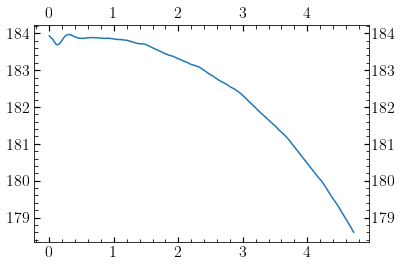

In [28]:
plot(t_bfe_HR, S_all_HR[:,0,0,0], label=r'$10^{8}, dt=0.02$')
#plot(t_bfe_HR, S_all_HR_Lint[:,0,0,0], '-o', alpha=0.5, label=r'$10^{8}, dt=0.1$')
plot(t_bfe_LR, S_all_LR[:,0,0,0], label=r'$10^{6}, dt=0.02$')
legend(fontsize=14)
xlabel(r'$\rm{time\ [Gyr]}$')
ylabel(r'$\rm{Log_{10}S_{0,0,0}}$')


In [22]:
def get_center(coeff_path):
    line = linecache.getline(coeff_path, 5)
    line2 = line.split(":",1)[1].rstrip('\n')
    list_str = line2.replace('[', '').replace(']', '').split(' ')
    list_com = list(filter(None, list_str))
    
    xcom = float(list_com[0])
    ycom = float(list_com[1])
    zcom = float(list_com[2])
    
    
    line = linecache.getline(coeff_path, 6)
    line2 = line.split(":",1)[1].rstrip('\n')
    list_str = line2.replace('[', '').replace(']', '').split(' ')
    list_com = list(filter(None, list_str))
    
    vxcom = float(list_com[0])
    vycom = float(list_com[1])
    vzcom = float(list_com[2])
    
    return np.array([xcom, ycom, zcom]), np.array([vxcom, vycom, vzcom])

In [23]:
rcom_all = np.zeros((int(snap2), 3))
vcom_all = np.zeros((int(snap2), 3))

rcom_all_LR = np.zeros((int(snap3), 3))
vcom_all_LR = np.zeros((int(snap3), 3))

for i in range(int(snap2)):
    rcom_all[i], vcom_all[i] = get_center(coeff_path+'_{:0>3d}.txt'.format(i))
for i in range(int(snap3)):
    rcom_all_LR[i], vcom_all_LR[i] = get_center(coeff_path_LR+'_{:0>3d}.txt'.format(i))

(0.0, 20.0)

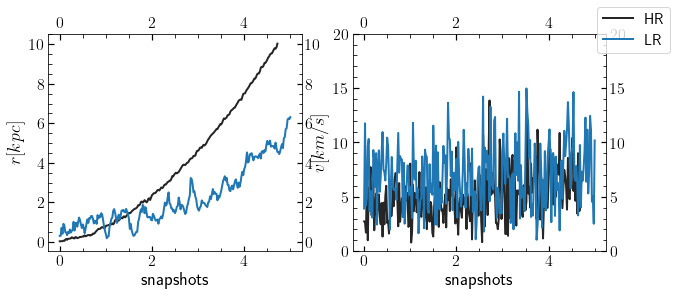

In [30]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
ax[0].plot(t_bfe_HR, np.sqrt(np.sum(rcom_all**2, axis=1)), label=' HR', c='k', alpha=0.85, lw=2)
ax[0].plot(t_bfe_LR, np.sqrt(np.sum(rcom_all_LR**2, axis=1)), label='LR', lw=2)
fig.legend(fontsize=15)
ax[0].set_xlabel('snapshots')
ax[0].set_ylabel('$r[kpc]$')

ax[1].plot(t_bfe_HR, np.sqrt(np.sum(vcom_all**2, axis=1)), label='vCOM HR', c='k', alpha=0.85, lw=2)
ax[1].plot(t_bfe_LR, np.sqrt(np.sum(vcom_all_LR**2, axis=1)), label='vCOM LR', lw=2)
ax[1].set_xlabel('snapshots')
ax[1].set_ylabel('$v[km/s]$')
ax[1].set_ylim(0, 20)
#savefig('COM_position_vs_t.png', bbox_inches='tight')
#savefig('COM_position_vs_t.pdf', bbox_inches='tight')

In [ ]:
vcom = np.gradient(t_bfe_HR, rcom_all[:,0])

In [ ]:
plot(t_bfe_HR, vcom)
plot(t_bfe_HR, vcom_all[:,0])

ylim(-20, 20)

In [11]:
n_orbits = 30
nsnaps_nbody = int(snap2)

In [12]:
data_nbody_all = np.zeros((n_orbits, nsnaps_nbody, 6))
for i in range(n_orbits):
    data_nbody_all[i] = np.loadtxt('../data/nbody_orbits/orbits_circular_MW2_10M_halo_vir_particle_{:0>3d}.txt'.format(i))

In [13]:
r_init = data_nbody_all[0:n_orbits,0,0:3]
v_init = data_nbody_all[0:n_orbits,0,3:6]

In [14]:
xyz_all = data_nbody_all[0:n_orbits,:,0:3]
vxyz_all = data_nbody_all[0:n_orbits,:,3:6]

In [15]:
r_all = np.sqrt(np.sum(xyz_all**2, axis=2))

In [50]:
v_init[9]

array([ -54.14494324, -219.20701599, -245.93095398])

In [52]:
vxyz_all[9][0]

array([ -54.14494324, -219.20701599, -245.93095398])

In [17]:
peris = np.zeros(n_orbits)
apos = np.zeros(n_orbits)

In [18]:
for i in range(n_orbits):
    peris[i] = np.min(r_all[i])
    apos[i] = np.max(r_all[i])

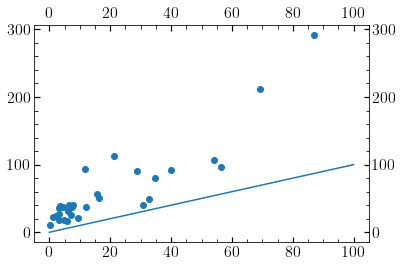

In [19]:
scatter(peris, apos)
plot([0,100], [0, 100])

In [114]:
m2 = 1.85966E12
halo_teo = gp.HernquistPotential(m=m2*u.Msun, c=rs_halo*u.kpc, 
                                 units=[u.kpc, u.Gyr, u.Msun, u.radian])

w0 = gd.PhaseSpacePosition(pos=[100, 100, 0]*u.kpc, vel=[0, -100, 0]*u.km/u.s)
orbit_halo_teo = gp.Hamiltonian(halo_teo).integrate_orbit(w0, dt=0.01*u.Gyr, n_steps=100)

In [125]:
v_factor = (1*u.kpc/u.Gyr).to(u.km/u.s)

In [142]:
def analytic_orbits(pos_ics, vel_ics, dt, nsnaps):
    pos = np.zeros((len(pos_ics), nsnaps, 3))
    vel = np.zeros((len(vel_ics), nsnaps, 3))
    m2 = 1.85966E12
    halo_teo = gp.HernquistPotential(m=m2*u.Msun, c=rs_halo*u.kpc, 
                                     units=[u.kpc, u.Gyr, u.Msun, u.radian])
    for i in range(len(pos_ics)):
        #print(pos_ics[i])
        #print(vel_ics[i])
        w0 = gd.PhaseSpacePosition(pos=pos_ics[i]*u.kpc, vel=vel_ics[i]*u.km/u.s)
        orbit_halo_teo = gp.Hamiltonian(halo_teo).integrate_orbit(w0, dt=dt*u.Gyr, n_steps=nsnaps-1)
        pos[i] = orbit_halo_teo.xyz.value.T
        vel[i] = orbit_halo_teo.v_xyz.value.T
        #print(vel[i][0])
    return pos, vel
    
def scf_orbits(S, T, pos_ics, vel_ics, dt, nsnaps, rcom=0, com_xj=1, com_vj=1):
    pos_all_t = np.zeros((len(pos_ics), nsnaps, 3))
    vel_all_t = np.zeros((len(pos_ics), nsnaps, 3))
    t = nsnaps*dt
    
    #m = 1.5713E12
        
    if rcom==1:
        print('using moving COM')
        halo_t = gp.scf.InterpolatedSCFPotential(m=1e10, r_s=rs_halo, Sjnlm=S, Tjnlm=T, 
                                                 tj=np.arange(0, t, dt),
                                                 com_xj=com_xj, com_vj=com_vj,
                                                 units=[u.kpc, u.Gyr, u.Msun, u.radian])
    else:
        halo_t = gp.scf.InterpolatedSCFPotential(m=1e10, r_s=rs_halo, Sjnlm=S, Tjnlm=T, 
                                                 tj=np.arange(0, t, dt),
                                                 com_xj=1, com_vj=1,
                                                 units=[u.kpc, u.Gyr, u.Msun, u.radian])
    
    if len(shape(S))==3:
        halo_t = gp.scf.SCFPotential(m=1e10, r_s=rs_halo, Snlm=S, Tnlm=T,
                                      units=[u.kpc, u.Gyr, u.Msun, u.radian])
    
    for i in range(len(pos_ics)):
        w0 = gd.PhaseSpacePosition(pos=pos_ics[i]*u.kpc,
                                   vel=vel_ics[i]*u.km/u.s)
        
        orbit_halo = gp.Hamiltonian(halo_t).integrate_orbit(w0, dt=dt*u.Gyr, n_steps=nsnaps-1)
        pos_all_t[i] = orbit_halo.xyz.value.T
        vel_all_t[i] = orbit_halo.v_xyz.value.T
        
    return pos_all_t, vel_all_t

# Integrating orbits

In [17]:
#snap1 = 0
#snap2 = 236
#snap3 = 251

#dt = 0.02
#init_time= snap1*dt
#max_time_HR = snap2*dt
#max_time_LR = snap3*dt

In [130]:
pos_teo, vel_teo = analytic_orbits(r_init, v_init, dt, int(snap3))

In [106]:
pos_teo, vel_teo, ot = analytic_orbits(r_init[9:10], v_init[9:10], dt, int(snap3))

[ -4.59875822   2.1234982  -11.13512421]
[ -54.14494324 -219.20701599 -245.93095398]
[ -55.37469212 -224.18568192 -251.5165784 ]


In [111]:
v_init[9]

array([ -54.14494324, -219.20701599, -245.93095398])

In [110]:
ot.vel[0]

<CartesianDifferential (d_x, d_y, d_z) in kpc / Gyr
    (-55.37469212, -224.18568192, -251.5165784)>

In [90]:
vel_teo[0][0]

array([ -55.37469212, -224.18568192, -251.5165784 ])

In [150]:
#pos_all_HR_t0, vel_all_HR_t0 = scf_orbits(S_all_HR[0], T_all_HR[0], r_init,v_init, dt, snap2, max_time_HR)
pos_all_HR, vel_all_HR = scf_orbits(S_all_HR, T_all_HR, r_init, v_init, dt, snap2, max_time_HR)

In [169]:
pos_all_HR_rcom, vel_all_HR_rcom = scf_orbits(S_all_HR, T_all_HR, r_init, v_init, dt, snap2, max_time_HR, 
                                                  rcom=1, com_xj=-rcom_all)

using moving COM


In [170]:
pos_all_HR_rcom2, vel_all_HR_rcom2 = scf_orbits(S_all_HR, T_all_HR,r_init, v_init, dt, snap2, max_time_HR, 
                                                  rcom=1, com_xj=rcom_all, com_vj=vcom_all*10)

using moving COM


In [132]:
print("ICs:", r_init[9])
print("Teo:", pos_teo[9][0])
print("BFE com:", pos_all_HR_rcom[9][0])
print("Gadget:", xyz_all[9][0])


ICs: [ -4.59875822   2.1234982  -11.13512421]
Teo: [ -4.59875822   2.1234982  -11.13512421]
BFE com: [ -4.59875822   2.1234982  -11.13512421]
Gadget: [ -4.59875822   2.1234982  -11.13512421]


In [135]:
print("ICs:", v_init[9])
print("Teo:", vel_teo[9][0]*v_factor)
print("BFE com:",vel_all_HR_rcom[9][0]*v_factor)
print("Gadget:", vxyz_all[9][0])

ICs: [ -54.14494324 -219.20701599 -245.93095398]
Teo: [ -54.14494324 -219.20701599 -245.93095398] km / s
BFE com: [ -54.14494324 -219.20701599 -245.93095398] km / s
Gadget: [ -54.14494324 -219.20701599 -245.93095398]


In [76]:
vel_te

array([0.14242055, 0.04724376, 0.00711547])

In [77]:
vcom_all[9]

array([-0.4665461 ,  0.91914924, -3.31799464])

In [45]:
#pos_all_HR_Lint, vel_all`a_HR_Lint = orbit_ensamble(S_all_HR_Lint, T_all_HR_Lint, r_init, 
#                                              v_init, 0.1, 237, 236, 4.74)

In [46]:
#pos_all_HR_Lint2, vel_all_HR_Lint2 = orbit_ensamble(S_all_HR_Lint2, T_all_HR_Lint2, r_init, 
#                                                    v_init, 0.04, 119, 118, 4.74)

In [47]:
#pos_all_HR_Lint3, vel_all_HR_Lint3 = orbit_ensamble(S_all_HR_Lint3, T_all_HR_Lint3, r_init, 
#                                                    v_init, 0.08, 59, 58, 4.74)

In [123]:
#pos_all_LR, vel_all_LR = orbit_ensamble(S_all_LR, T_all_LR,
#                                    r_init,  v_init, 
#                                    0.02, 251, 250, 5)

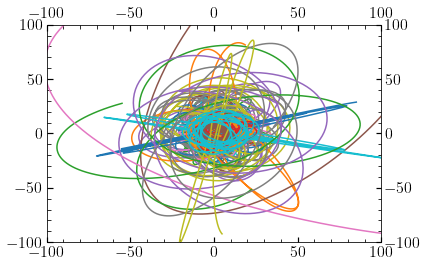

In [321]:
for i in range(n_orbits):
    plot(pos_all_HR[i,:,0], pos_all_HR[i,:,1])
    xlim(-100, 100)
    ylim(-100, 100)

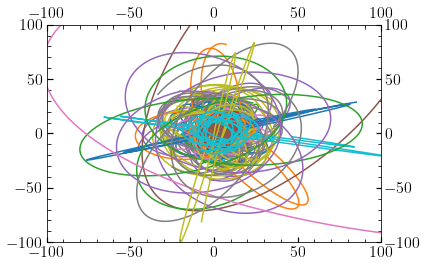

In [295]:
for i in range(n_orbits):
    plot(xyz_all[i,:,0], xyz_all[i,:,1])
    xlim(-100, 100)
    ylim(-100, 100)

In [296]:
len(xyz_all[i,:,0])

237

## Centering effect in positions of the orbits

In [191]:
poss = np.array([xyz_all[9], pos_all_HR[9], pos_all_HR[8]])

In [192]:
np.shape(poss)

(3, 237, 3)

In [193]:
np.shape(poss)[0]

3

Text(0, 0.5, '$r_{gal} \\rm{[kpc]}$')

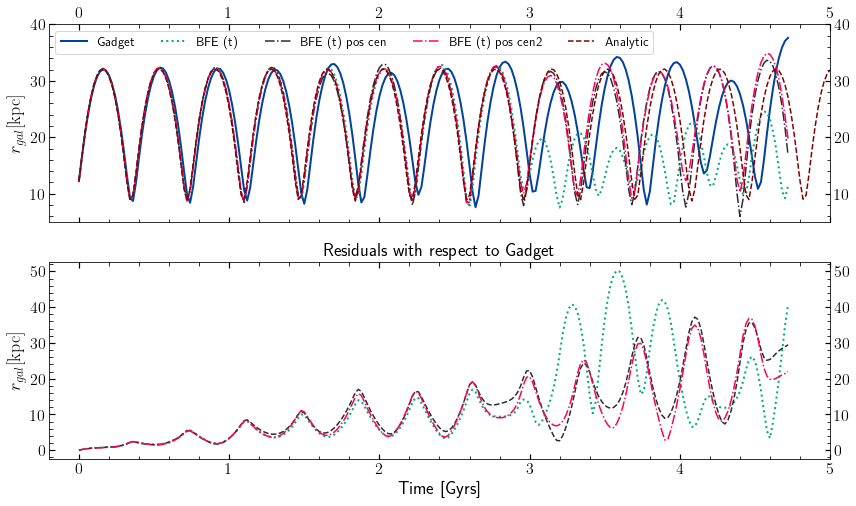

In [175]:
fig, ax = plt.subplots(2, 1, figsize=(14, 8), sharex=True)
cl = ["#00429d","#00ab7d","#2c2c2c","#ff005e","#810000"]

#ax[0].set_title('')
orbit = 9
axs = ax.flatten()
axs[0].plot(t_nbody, np.sqrt(np.sum((xyz_all[9])**2, axis=1)), label='Gadget', c=cl[0], lw=2)
#axs[0].plot(t_bfe_HR, np.sqrt(np.sum(pos_all_HR_t0[9]**2, axis=1)), label='BFE (t=0)', c=cl[1], ls='-')
axs[0].plot(t_bfe_HR, np.sqrt(np.sum(pos_all_HR[9]**2, axis=1)), label='BFE (t)', c=cl[1], lw=2, ls=':')
axs[0].plot(t_bfe_HR, np.sqrt(np.sum(pos_all_HR_rcom[9]**2, axis=1)), label='BFE (t) pos cen', c=cl[2], ls='-.')
axs[0].plot(t_bfe_HR, np.sqrt(np.sum((pos_all_HR_rcom[9]+rcom_all)**2, axis=1)), label='BFE (t) pos cen2', c=cl[3], ls='-.')

axs[0].plot(t_bfe_LR, np.sqrt(np.sum(pos_teo[9]**2, axis=1)), label='Analytic', c=cl[4], ls='--')


# Residuals 

#axs[1].plot(t_bfe_HR, np.sqrt(np.sum((pos_all_HR_t0[9]-xyz_all[9])**2, axis=1)), 
#            label='BFE (t=0)', c=cl[0], ls='-')
axs[1].plot(t_bfe_HR, np.sqrt(np.sum((pos_all_HR[9]-xyz_all[9])**2, axis=1)),
            label='BFE (t)', c=cl[1], lw=2, ls=':')
axs[1].plot(t_bfe_HR, np.sqrt(np.sum((pos_all_HR_rcom[9]-xyz_all[9])**2, axis=1))
            , label='BFE (t) pos cen', c=cl[2],  ls='--')
axs[1].plot(t_bfe_HR, np.sqrt(np.sum(((pos_all_HR_rcom[9]+rcom_all)-xyz_all[9])**2, axis=1))
            , label='BFE (t) pos vel cen', c=cl[3],  ls='-.')

#axs[1].plot(t_bfe_LR, np.sqrt(np.sum(pos_teo[9]**2, axis=1))-np.sqrt(np.sum((xyz_all[9])**2, axis=1))
#            , label='Analytic', c=cl[4], ls='--')




axs[0].legend(ncol=5, fontsize=13)


axs[0].set_xlim(-0.2, 5)
axs[0].set_ylim(5, 40)
#axs[1].set_ylim(-20, 20)
axs[1].set_title('Residuals with respect to Gadget', fontsize=18)
axs[1].set_xlabel('Time [Gyrs]')

axs[0].set_ylabel(r'$r_{gal} \rm{[kpc]}$')
axs[1].set_ylabel(r'$r_{gal} \rm{[kpc]}$')



#savefig('orbits_BFE_HR.pdf', bbox_inches='tight')
#savefig('orbits_BFE_HR.png', bbox_inches='tight')

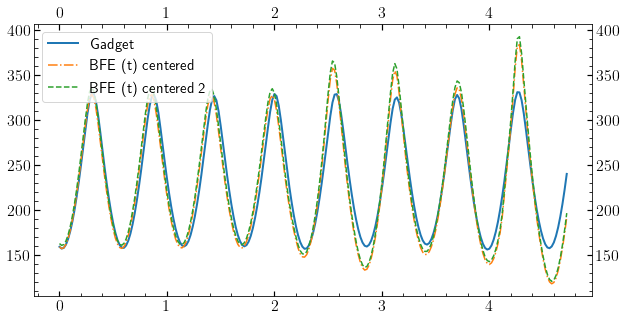

In [138]:
figure(figsize=(10, 5))
plot(t_nbody, np.sqrt(np.sum((vxyz_all[17])**2, axis=1)), label='Gadget', lw=2)
plot(t_bfe_HR, np.sqrt(np.sum(vel_all_HR_rcom[17]**2, axis=1))*v_factor, label='BFE (t) centered', ls='-.')
plot(t_bfe_HR, np.sqrt(np.sum(vel_all_HR_rcom[17]**2, axis=1)), label='BFE (t) centered 2', ls='--')
legend(fontsize=15)

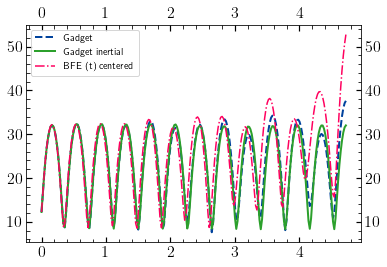

In [39]:
plot(t_nbody, np.sqrt(np.sum((xyz_all[9])**2, axis=1)), label='Gadget', c=cl[0], lw=2, ls='--')
plot(t_nbody, np.sqrt(np.sum((xyz_all[9]-rcom_all)**2, axis=1)), label='Gadget inertial', c='C2', lw=2)

#plot(t_bfe_HR, np.sqrt(np.sum(pos_all_HR_t0[9]**2, axis=1)), label='BFE (t=0)', c=cl[1], ls='-')
#plot(t_bfe_HR, np.sqrt(np.sum(pos_all_HR[9]**2, axis=1)), label='BFE (t)', c=cl[2], lw=2, ls=':')
plot(t_bfe_HR, np.sqrt(np.sum(pos_all_HR_rcom[9]**2, axis=1)), label='BFE (t) centered', c=cl[3], ls='-.')
legend()

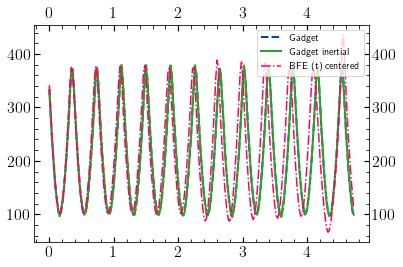

In [40]:
plot(t_nbody, np.sqrt(np.sum((vxyz_all[9])**2, axis=1)), label='Gadget', c=cl[0], lw=2, ls='--')
plot(t_nbody, np.sqrt(np.sum((vxyz_all[9]-vcom_all)**2, axis=1)), label='Gadget inertial', c='C2', lw=2)

#plot(t_bfe_HR, np.sqrt(np.sum(pos_all_HR_t0[9]**2, axis=1)), label='BFE (t=0)', c=cl[1], ls='-')
#plot(t_bfe_HR, np.sqrt(np.sum(pos_all_HR[9]**2, axis=1)), label='BFE (t)', c=cl[2], lw=2, ls=':')
plot(t_bfe_HR, np.sqrt(np.sum(vel_all_HR_rcom[9]**2, axis=1)), label='BFE (t) centered', c=cl[3], ls='-.')
legend()

In [62]:
vel_all_HR_rcom[9][1]

array([ -30.41634707, -225.98906637, -186.76633531])

In [61]:
vxyz_all[9][0]

array([ -54.14494324, -219.20701599, -245.93095398])

In [48]:
#vxyz_all[9][0]

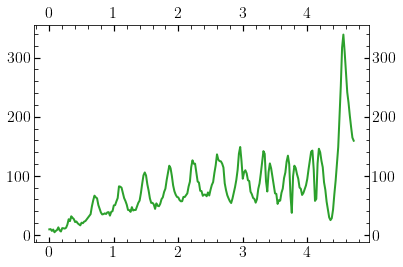

In [41]:
#plot(t_nbody, np.sqrt(np.sum((vxyz_all[9])**2, axis=1)), label='Gadget', c=cl[0], lw=2, ls='--')
plot(t_nbody, np.sqrt(np.sum((vel_all_HR_rcom[9]-(vxyz_all[9]-vcom_all))**2, axis=1)), label='Gadget inertial', c='C2', lw=2)

#plot(t_bfe_HR, np.sqrt(np.sum(pos_all_HR_t0[9]**2, axis=1)), label='BFE (t=0)', c=cl[1], ls='-')
#plot(t_bfe_HR, np.sqrt(np.sum(pos_all_HR[9]**2, axis=1)), label='BFE (t)', c=cl[2], lw=2, ls=':')
#plot(t_bfe_HR, np.sqrt(np.sum(vel_all_HR_rcom[9]**2, axis=1)), label='BFE (t) centered', c=cl[3], ls='-.')
#legend()

In [303]:
pos_all_HR_rcom2, vel_all_HR_rcom2 = scf_orbits(S_all_HR, T_all_HR,r_init, v_init, dt, 
                                                snap2, max_time_HR,  
                                                rcom=1, com_xj=rcom_all_LR)

using moving COM


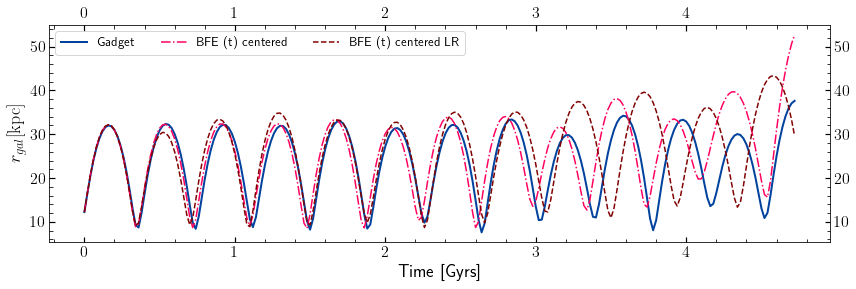

In [304]:
fig, ax = plt.subplots(1, 1, figsize=(14, 4), sharex=True)
cl = ["#00429d","#00ab7d","#2c2c2c","#ff005e","#810000"]

#ax[0].set_title('')
orbit = 9
ax.plot(t_nbody, np.sqrt(np.sum((xyz_all[9])**2, axis=1)), label='Gadget', c=cl[0], lw=2)
ax.plot(t_bfe_HR, np.sqrt(np.sum(pos_all_HR_rcom[9]**2, axis=1)), label='BFE (t) centered', c=cl[3], ls='-.')
ax.plot(t_bfe_HR, np.sqrt(np.sum(pos_all_HR_rcom2[9]**2, axis=1)), label='BFE (t) centered LR', c=cl[4], ls='--')

legend(ncol=5, fontsize=13)

ax.set_xlabel('Time [Gyrs]')

ax.set_ylabel(r'$r_{gal} \rm{[kpc]}$')

savefig('orbits_BFE_HR_centering.pdf', bbox_inches='tight')
savefig('orbits_BFE_HR_centering.png', bbox_inches='tight')

## SN cut effect



In [150]:
sn1 = 2
sn2 = 5
sn3 = 10
S_all_HR_sn1, T_all_HR_sn1 = get_coefficients(coeff_path, snap2, sn1, m_mw1, nmax_HR, lmax_HR)
S_all_HR_sn2, T_all_HR_sn2 = get_coefficients(coeff_path, snap2, sn2, m_mw1, nmax_HR, lmax_HR)
S_all_HR_sn3, T_all_HR_sn3 = get_coefficients(coeff_path, snap2, sn3, m_mw1, nmax_HR, lmax_HR)

/home/ngc/Work/research/BFE_integrator/notebooks/../../MW-LMC-SCF/code/coefficients_smoothing.py:128: RuntimeWarning: invalid value encountered in double_scalars
  bt = 1 / (1 + (varT/T**2))


In [305]:
pos_all_HR_rcom_sn1, vel_all_HR_rcom_sn1 = scf_orbits(S_all_HR_sn1, T_all_HR_sn1 ,r_init, v_init, 
                                                      dt, snap2, max_time_HR, rcom=1, com_xj=rcom_all)

pos_all_HR_rcom_sn2, vel_all_HR_rcom_sn2 = scf_orbits(S_all_HR_sn2, T_all_HR_sn2 ,r_init, v_init, 
                                                      dt, snap2, max_time_HR, rcom=1, com_xj=rcom_all)

pos_all_HR_rcom_sn3, vel_all_HR_rcom_sn3 = scf_orbits(S_all_HR_sn3, T_all_HR_sn3 ,r_init, v_init, 
                                                      dt, snap2, max_time_HR, rcom=1, com_xj=rcom_all)

using moving COM
using moving COM
using moving COM


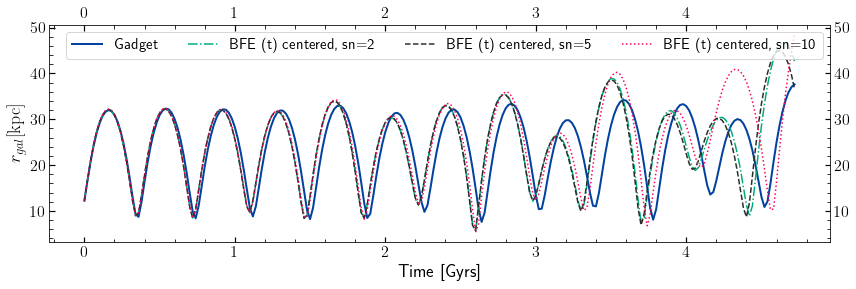

In [306]:
fig, ax = plt.subplots(1, 1, figsize=(14, 4), sharex=True)
cl = ["#00429d","#00ab7d","#2c2c2c","#ff005e","#810000"]

#ax[0].set_title('')
orbit = 9
ax.plot(t_nbody, np.sqrt(np.sum((xyz_all[9])**2, axis=1)), label='Gadget', c=cl[0], lw=2)
ax.plot(t_bfe_HR, np.sqrt(np.sum(pos_all_HR_rcom_sn1[9]**2, axis=1)), label='BFE (t) centered, sn=2', c=cl[1], ls='-.')
ax.plot(t_bfe_HR, np.sqrt(np.sum(pos_all_HR_rcom_sn2[9]**2, axis=1)), label='BFE (t) centered, sn=5', c=cl[2], ls='--')
ax.plot(t_bfe_HR, np.sqrt(np.sum(pos_all_HR_rcom_sn3[9]**2, axis=1)), label='BFE (t) centered, sn=10', c=cl[3], ls=':')

legend(ncol=5, fontsize=15)

ax.set_xlabel('Time [Gyrs]')

ax.set_ylabel(r'$r_{gal} \rm{[kpc]}$')

savefig('orbits_BFE_HR_centering_sn.pdf', bbox_inches='tight')
savefig('orbits_BFE_HR_centering_sn.png', bbox_inches='tight')

# LR  vs HR 

In [307]:
print(max_time, max_time2)

4.72 5.0200000000000005


In [308]:
#pos_all_LR, vel_all_LR = orbit_ensamble(S_all_LR, T_all_LR,
#                                    r_init,  v_init, 
#                                    0.02, 251, 250, 5)

In [309]:
pos_all_LR, vel_all_LR = scf_orbits(S_all_LR, T_all_LR, r_init,  v_init, dt, snap3, max_time_LR)
pos_all_LR_com, vel_all_LR_com = scf_orbits(S_all_LR, T_all_LR, r_init, 
                                            v_init, dt, snap3, max_time_LR, 
                                            rcom=1, com_xj=rcom_all_LR)

using moving COM


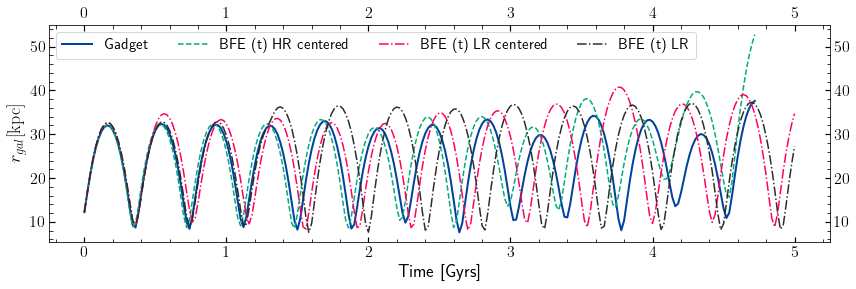

In [318]:
fig, ax = plt.subplots(1, 1, figsize=(14, 4), sharex=True)
cl = ["#00429d","#00ab7d","#2c2c2c","#ff005e","#810000"]

#ax[0].set_title('')
orbit = 9
ax.plot(t_nbody, np.sqrt(np.sum((xyz_all[9])**2, axis=1)), label='Gadget', c=cl[0], lw=2)
ax.plot(t_bfe_HR, np.sqrt(np.sum(pos_all_HR_rcom[9]**2, axis=1)), label='BFE (t) HR centered', c=cl[1], ls='--')
ax.plot(t_bfe_LR, np.sqrt(np.sum(pos_all_LR_com[9]**2, axis=1)), label='BFE (t) LR centered', c=cl[3], ls='-.')
ax.plot(t_bfe_LR, np.sqrt(np.sum(pos_all_LR[9]**2, axis=1)), label='BFE (t) LR', c=cl[2], ls='-.')


legend(ncol=5, fontsize=15)

ax.set_xlabel('Time [Gyrs]')

ax.set_ylabel(r'$r_{gal} \rm{[kpc]}$')

savefig('orbits_BFE_HR_vs_LR_centering_orbit1.png', bbox_inches='tight')
savefig('orbits_BFE_HR_vs_LR_centering_orbit1.pdf', bbox_inches='tight')

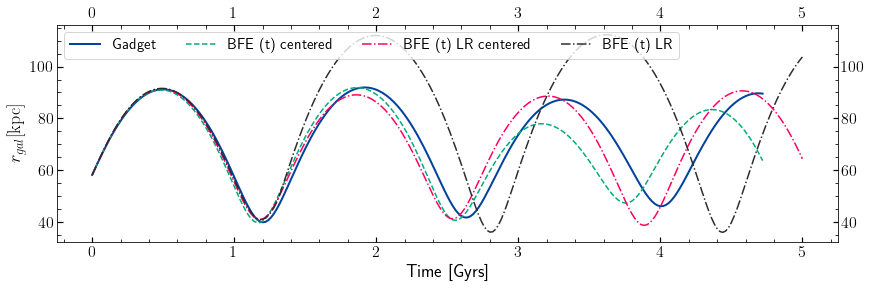

In [322]:
fig, ax = plt.subplots(1, 1, figsize=(14, 4), sharex=True)
cl = ["#00429d","#00ab7d","#2c2c2c","#ff005e","#810000"]

#ax[0].set_title('')
orbit = 27
ax.plot(t_nbody, np.sqrt(np.sum((xyz_all[orbit])**2, axis=1)), label='Gadget', c=cl[0], lw=2)
ax.plot(t_bfe_HR, np.sqrt(np.sum(pos_all_HR_rcom[orbit]**2, axis=1)), label='BFE (t) centered', c=cl[1], ls='--')
ax.plot(t_bfe_LR, np.sqrt(np.sum(pos_all_LR_com[orbit]**2, axis=1)), label='BFE (t) LR centered', c=cl[3], ls='-.')
ax.plot(t_bfe_LR, np.sqrt(np.sum(pos_all_LR[orbit]**2, axis=1)), label='BFE (t) LR', c=cl[2], ls='-.')


legend(ncol=5, fontsize=15)

ax.set_xlabel('Time [Gyrs]')

ax.set_ylabel(r'$r_{gal} \rm{[kpc]}$')

savefig('orbits_BFE_HR_vs_LR_centering_orbit2.pdf', bbox_inches='tight')
savefig('orbits_BFE_HR_vs_LR_centering_orbit2.png', bbox_inches='tight')

# LR sn

In [312]:
#S_all_LR_sn1, T_all_LR_sn1 = get_coefficients(coeff_path_LR, snap3, sn1, m_mw2, nmax_HR, lmax_HR)
#S_all_LR_sn2, T_all_LR_sn2 = get_coefficients(coeff_path_LR, snap3, sn2, m_mw2, nmax_HR, lmax_HR)
#S_all_LR_sn3, T_all_LR_sn3 = get_coefficients(coeff_path_LR, snap3, sn3, m_mw2, nmax_HR, lmax_HR)

pos_all_LR_rcom_sn1, vel_all_LR_rcom_sn1 = scf_orbits(S_all_LR_sn1, T_all_LR_sn1 ,r_init, v_init, 
                                                      dt, snap3, max_time_LR, rcom=1, com_xj=rcom_all_LR)

pos_all_LR_rcom_sn2, vel_all_LR_rcom_sn2 = scf_orbits(S_all_LR_sn2, T_all_LR_sn2 ,r_init, v_init, 
                                                      dt, snap3, max_time_LR, rcom=1, com_xj=rcom_all_LR)

pos_all_LR_rcom_sn3, vel_all_LR_rcom_sn3 = scf_orbits(S_all_LR_sn3, T_all_LR_sn3 ,r_init, v_init, 
                                                      dt, snap3, max_time_LR, rcom=1, com_xj=rcom_all_LR)

using moving COM
using moving COM
using moving COM


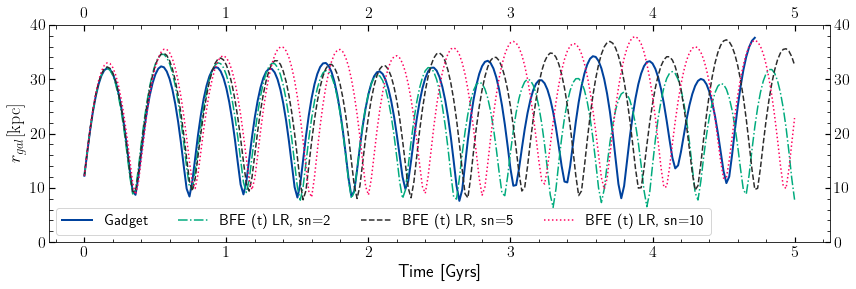

In [317]:
fig, ax = plt.subplots(1, 1, figsize=(14, 4), sharex=True)
cl = ["#00429d","#00ab7d","#2c2c2c","#ff005e","#810000"]

#ax[0].set_title('')
orbit = 9
ax.plot(t_nbody, np.sqrt(np.sum((xyz_all[orbit])**2, axis=1)), label='Gadget', c=cl[0], lw=2)
ax.plot(t_bfe_LR, np.sqrt(np.sum(pos_all_LR_rcom_sn1[orbit]**2, axis=1)), 
        label='BFE (t) LR, sn=2', c=cl[1], ls='-.')
ax.plot(t_bfe_LR, np.sqrt(np.sum(pos_all_LR_rcom_sn2[orbit]**2, axis=1)), 
        label='BFE (t) LR, sn=5', c=cl[2], ls='--')
ax.plot(t_bfe_LR, np.sqrt(np.sum(pos_all_LR_rcom_sn3[orbit]**2, axis=1)), 
        label='BFE (t) LR, sn=10', c=cl[3], ls=':')


legend(ncol=5, fontsize=15)

ax.set_xlabel('Time [Gyrs]')

ax.set_ylabel(r'$r_{gal} \rm{[kpc]}$')
ax.set_ylim(0, 40)
savefig('orbits_BFE_LR_centering_sn.pdf', bbox_inches='tight')
savefig('orbits_BFE_LR_centering_sn.png', bbox_inches='tight')

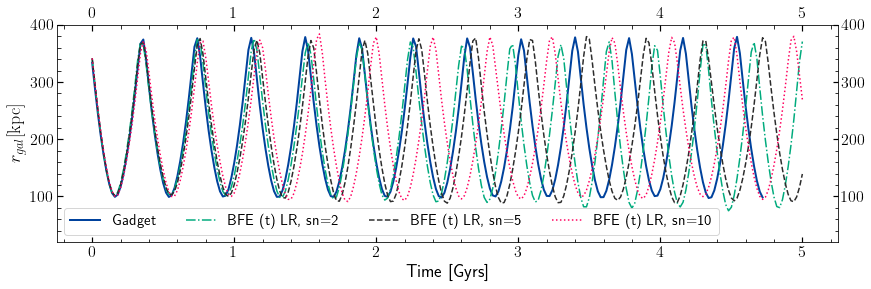

In [316]:
fig, ax = plt.subplots(1, 1, figsize=(14, 4), sharex=True)
cl = ["#00429d","#00ab7d","#2c2c2c","#ff005e","#810000"]

#ax[0].set_title('')
orbit = 9
ax.plot(t_nbody, np.sqrt(np.sum((vxyz_all[orbit])**2, axis=1)), label='Gadget', c=cl[0], lw=2)
ax.plot(t_bfe_LR, np.sqrt(np.sum(vel_all_LR_rcom_sn1[orbit]**2, axis=1)), 
        label='BFE (t) LR, sn=2', c=cl[1], ls='-.')
ax.plot(t_bfe_LR, np.sqrt(np.sum(vel_all_LR_rcom_sn2[orbit]**2, axis=1)), 
        label='BFE (t) LR, sn=5', c=cl[2], ls='--')
ax.plot(t_bfe_LR, np.sqrt(np.sum(vel_all_LR_rcom_sn3[orbit]**2, axis=1)), 
        label='BFE (t) LR, sn=10', c=cl[3], ls=':')


legend(ncol=5, fontsize=15)

ax.set_xlabel('Time [Gyrs]')
ax.set_ylabel(r'$r_{gal} \rm{[kpc]}$')
ax.set_ylim(20, 400)
savefig('orbits_BFE_LR_centering_sn_vel.pdf', bbox_inches='tight')
savefig('orbits_BFE_LR_centering_sn_vel.png', bbox_inches='tight')

Text(0, 0.5, '$v_{gal} \\rm{[km/s]}$')

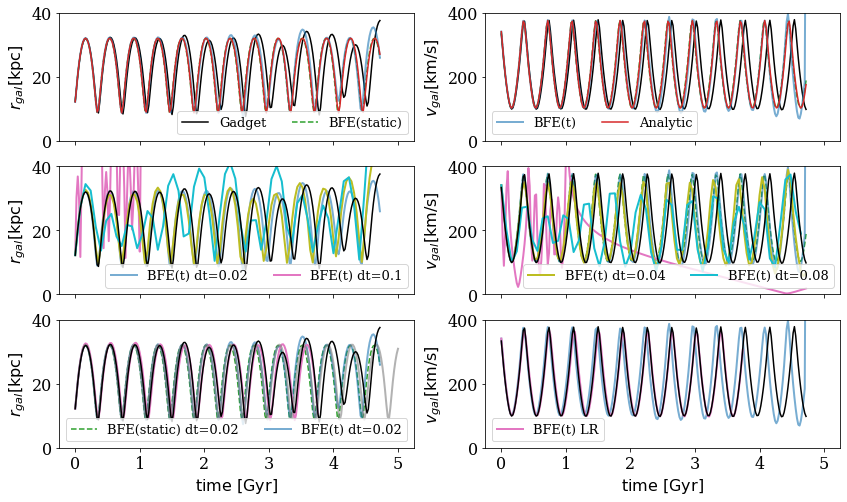

In [71]:
fig, ax = plt.subplots(3, 2, sharex=True, figsize=(14, 8))
#ax[0].set_title('')
orbit = ax.plot(t_bfe, np.sqrt(np.sum(pos_all_HR_rcom_sn2[9]**2, axis=1)), label='BFE (t) centered LR', c=cl[4], ls='--')

axs = ax.flatten()
axs[0].plot(t_bfe, np.sqrt(np.sum((xyz_all[9])**2, axis=1)), label='Gadget', c='k')
axs[0].plot(t_bfe, np.sqrt(np.sum(pos_allt0[9]**2, axis=1)), label='BFE(static)', c='C2', ls='--')
axs[0].plot(t_bfe, np.sqrt(np.sum(pos_all_t[9]**2, axis=1)), c='C0', alpha=0.6, lw=2)
axs[0].plot(t_bfe, np.sqrt(np.sum(pos_all_teo[9]**2, axis=1)), c='C3')
#plot(np.sqrt(np.sum((xyz_all[12]-rcom_all)**2, axis=1)), label='Gadget')

axs[1].plot(t_bfe, np.sqrt(np.sum((vxyz_all[9])**2, axis=1)), c='k')
axs[1].plot(t_bfe, np.sqrt(np.sum(vel_allt0[9]**2, axis=1)), c='C2', ls='--')
axs[1].plot(t_bfe, np.sqrt(np.sum(vel_all_t[9]**2, axis=1)), label='BFE(t)', c='C0', alpha=0.6, lw=2)
axs[1].plot(t_bfe, np.sqrt(np.sum(vel_all_teo[9]**2, axis=1)), label='Analytic', c='C3')


axs[2].plot(t_bfe, np.sqrt(np.sum(pos_all_t[9]**2, axis=1)), label='BFE(t) dt=0.02', c='C0', alpha=0.6, lw=2)
axs[2].plot(t_bfe, np.sqrt(np.sum(pos_all_t_Lint[9]**2, axis=1)), label='BFE(t) dt=0.1', c='C6', alpha=1, lw=2)
axs[2].plot(t_int2, np.sqrt(np.sum(pos_all_t_Lint2[9]**2, axis=1)), c='C8', alpha=1, lw=2)
axs[2].plot(t_int3, np.sqrt(np.sum(pos_all_t_Lint3[9]**2, axis=1)), c='C9', alpha=1, lw=2)

axs[2].plot(t_bfe, np.sqrt(np.sum((xyz_all[9])**2, axis=1)), c='k')


axs[3].plot(t_bfe, np.sqrt(np.sum(vel_allt0[9]**2, axis=1)), c='C2', ls='--')
axs[3].plot(t_bfe, np.sqrt(np.sum(vel_all_t[9]**2, axis=1)), c='C0', alpha=0.6, lw=2)
axs[3].plot(t_bfe, np.sqrt(np.sum(vel_all_t_Lint[9]**2, axis=1)), c='C6', alpha=1, lw=2)
axs[3].plot(t_int2, np.sqrt(np.sum(vel_all_t_Lint2[9]**2, axis=1)), label='BFE(t) dt=0.04', c='C8', alpha=1, lw=2)
axs[3].plot(t_int3, np.sqrt(np.sum(vel_all_t_Lint3[9]**2, axis=1)), label='BFE(t) dt=0.08', c='C9', alpha=1, lw=2)

axs[3].plot(t_bfe, np.sqrt(np.sum((vxyz_all[9])**2, axis=1)), c='k')



axs[4].plot(t_bfe, np.sqrt(np.sum(pos_allt0[9]**2, axis=1)), label='BFE(static) dt=0.02', c='C2', ls='--')
axs[4].plot(t_bfe, np.sqrt(np.sum(pos_all_t[9]**2, axis=1)), label='BFE(t) dt=0.02', c='C0', alpha=0.6, lw=2)
axs[4].plot(t_bfe_all, np.sqrt(np.sum(pos_all_t_LR[9]**2, axis=1)), c='C6', alpha=1, lw=2)
axs[4].plot(t_bfe_all, np.sqrt(np.sum(pos_allt0_LR[9]**2, axis=1)), c='C7', alpha=0.6, lw=2)
axs[4].plot(t_bfe, np.sqrt(np.sum((xyz_all[9])**2, axis=1)), c='k')

axs[5].plot(t_bfe, np.sqrt(np.sum(vel_all_t[9]**2, axis=1)), c='C0', alpha=0.6, lw=2)
axs[5].plot(t_bfe_all, np.sqrt(np.sum(vel_all_t_LR[9]**2, axis=1)), label='BFE(t) LR', c='C6', alpha=1, lw=2)
axs[5].plot(t_bfe, np.sqrt(np.sum((vxyz_all[9])**2, axis=1)), c='k')


axs[0].legend(ncol=4, fontsize=13)
axs[1].legend(ncol=4, fontsize=13)

axs[2].legend(ncol=4, fontsize=13)
axs[3].legend(ncol=4, fontsize=13)

axs[4].legend(ncol=4, fontsize=13)
axs[5].legend(ncol=4, fontsize=13)

axs[0].set_ylim(0, 40)
axs[2].set_ylim(0, 40)
axs[4].set_ylim(0, 40)

axs[1].set_ylim(0, 400)
axs[3].set_ylim(0, 400)
axs[5].set_ylim(0, 400)

axs[4].set_xlabel(r'$\rm{time\ [Gyr]}$')
axs[5].set_xlabel(r'$\rm{time\ [Gyr]}$')

axs[0].set_ylabel(r'$r_{gal} \rm{[kpc]}$')
axs[2].set_ylabel(r'$r_{gal} \rm{[kpc]}$')
axs[4].set_ylabel(r'$r_{gal} \rm{[kpc]}$')

axs[1].set_ylabel(r'$v_{gal} \rm{[km/s]}$')
axs[3].set_ylabel(r'$v_{gal} \rm{[km/s]}$')
axs[5].set_ylabel(r'$v_{gal} \rm{[km/s]}$')

#savefig('orbits_all_20.pdf', bbox_inches='tight')

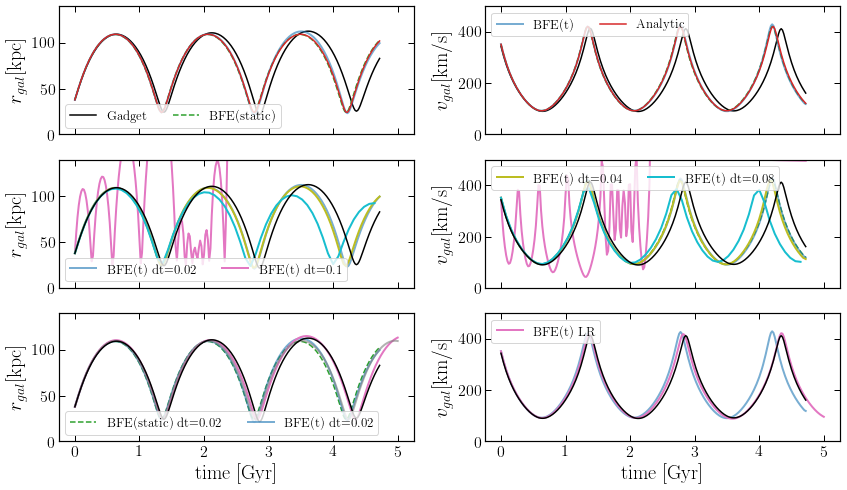

In [299]:
fig, ax = plt.subplots(3, 2, sharex=True, figsize=(14, 8))
#ax[0].set_title('')
orbit = 28
axs = ax.flatten()
axs[0].plot(t_bfe, np.sqrt(np.sum((xyz_all[orbit])**2, axis=1)), label='Gadget', c='k')
axs[0].plot(t_bfe, np.sqrt(np.sum(pos_allt0[orbit]**2, axis=1)), label='BFE(static)', c='C2', ls='--')
axs[0].plot(t_bfe, np.sqrt(np.sum(pos_all_t[orbit]**2, axis=1)), c='C0', alpha=0.6, lw=2)
axs[0].plot(t_bfe, np.sqrt(np.sum(pos_all_teo[orbit]**2, axis=1)), c='C3')
#plot(np.sqrt(np.sum((xyz_all[12]-rcom_all)**2, axis=1)), label='Gadget')
#axs[0].plot(t_bfe, np.sqrt(np.sum(pos_all_t_rcom[orbit]**2, axis=1)), c='C4')


axs[1].plot(t_bfe, np.sqrt(np.sum((vxyz_all[orbit])**2, axis=1)), c='k')
axs[1].plot(t_bfe, np.sqrt(np.sum(vel_allt0[orbit]**2, axis=1)), c='C2', ls='--')
axs[1].plot(t_bfe, np.sqrt(np.sum(vel_all_t[orbit]**2, axis=1)), label='BFE(t)', c='C0', alpha=0.6, lw=2)
axs[1].plot(t_bfe, np.sqrt(np.sum(vel_all_teo[orbit]**2, axis=1)), label='Analytic', c='C3')


axs[2].plot(t_bfe, np.sqrt(np.sum(pos_all_t[orbit]**2, axis=1)), label='BFE(t) dt=0.02', c='C0', alpha=0.6, lw=2)
axs[2].plot(t_bfe, np.sqrt(np.sum(pos_all_t_Lint[orbit]**2, axis=1)),  label='BFE(t) dt=0.1', c='C6', alpha=1, lw=2)
axs[2].plot(t_int2, np.sqrt(np.sum(pos_all_t_Lint2[orbit]**2, axis=1)), c='C8', alpha=1, lw=2)
axs[2].plot(t_int3, np.sqrt(np.sum(pos_all_t_Lint3[orbit]**2, axis=1)), c='C9', alpha=1, lw=2)

axs[2].plot(t_bfe, np.sqrt(np.sum((xyz_all[orbit])**2, axis=1)), c='k')


axs[3].plot(t_bfe, np.sqrt(np.sum(vel_allt0[orbit]**2, axis=1)), c='C2', ls='--')
axs[3].plot(t_bfe, np.sqrt(np.sum(vel_all_t[orbit]**2, axis=1)), c='C0', alpha=0.6, lw=2)
axs[3].plot(t_bfe, np.sqrt(np.sum(vel_all_t_Lint[orbit]**2, axis=1)), c='C6', alpha=1, lw=2)
axs[3].plot(t_int2, np.sqrt(np.sum(vel_all_t_Lint2[orbit]**2, axis=1)), label='BFE(t) dt=0.04', c='C8', alpha=1, lw=2)
axs[3].plot(t_int3, np.sqrt(np.sum(vel_all_t_Lint3[orbit]**2, axis=1)), label='BFE(t) dt=0.08', c='C9', alpha=1, lw=2)

axs[3].plot(t_bfe, np.sqrt(np.sum((vxyz_all[orbit])**2, axis=1)), c='k')



axs[4].plot(t_bfe, np.sqrt(np.sum(pos_allt0[orbit]**2, axis=1)), label='BFE(static) dt=0.02', c='C2', ls='--')
axs[4].plot(t_bfe, np.sqrt(np.sum(pos_all_t[orbit]**2, axis=1)), label='BFE(t) dt=0.02', c='C0', alpha=0.6, lw=2)
axs[4].plot(t_bfe_all, np.sqrt(np.sum(pos_all_t_LR[orbit]**2, axis=1)), c='C6', alpha=1, lw=2)
axs[4].plot(t_bfe_all, np.sqrt(np.sum(pos_allt0_LR[orbit]**2, axis=1)), c='C7', alpha=0.6, lw=2)
axs[4].plot(t_bfe, np.sqrt(np.sum((xyz_all[orbit])**2, axis=1)), c='k')

axs[5].plot(t_bfe, np.sqrt(np.sum(vel_all_t[orbit]**2, axis=1)), c='C0', alpha=0.6, lw=2)
axs[5].plot(t_bfe_all, np.sqrt(np.sum(vel_all_t_LR[orbit]**2, axis=1)), label='BFE(t) LR', c='C6', alpha=1, lw=2)
axs[5].plot(t_bfe, np.sqrt(np.sum((vxyz_all[orbit])**2, axis=1)), c='k')


axs[0].legend(ncol=4, fontsize=13)
axs[1].legend(ncol=4, fontsize=13)

axs[2].legend(ncol=4, fontsize=13)
axs[3].legend(ncol=4, fontsize=13)

axs[4].legend(ncol=4, fontsize=13)
axs[5].legend(ncol=4, fontsize=13)

axs[0].set_ylim(0, 140)
axs[2].set_ylim(0, 140)
axs[4].set_ylim(0, 140)

axs[1].set_ylim(0, 500)
axs[3].set_ylim(0, 500)
axs[5].set_ylim(0, 500)

axs[4].set_xlabel(r'$\rm{time\ [Gyr]}$')
axs[5].set_xlabel(r'$\rm{time\ [Gyr]}$')

axs[0].set_ylabel(r'$r_{gal} \rm{[kpc]}$')
axs[2].set_ylabel(r'$r_{gal} \rm{[kpc]}$')
axs[4].set_ylabel(r'$r_{gal} \rm{[kpc]}$')

axs[1].set_ylabel(r'$v_{gal} \rm{[km/s]}$')
axs[3].set_ylabel(r'$v_{gal} \rm{[km/s]}$')
axs[5].set_ylabel(r'$v_{gal} \rm{[km/s]}$')

savefig('orbits_all_80.pdf', bbox_inches='tight')

In [ ]:
## 

In [300]:
dist_orbits = np.zeros((n_orbits, nsnaps))
dist_orbits_bfet_g = np.zeros((n_orbits, nsnaps))
dist_orbits_bfet_teo = np.zeros((n_orbits, nsnaps))
dist_orbits_bfe_teo = np.zeros((n_orbits, nsnaps))
dist_orbits_bfe_g = np.zeros((n_orbits, nsnaps))
dist_orbits_teo_g = np.zeros((n_orbits, nsnaps))


for i in range(n_orbits):
    dist_orbits[i]=np.sqrt(np.sum((pos_allt0[i]-pos_all_t[i])**2, axis=1))
    dist_orbits_bfe_teo[i]=np.sqrt(np.sum((pos_allt0[i]-pos_all_teo[i])**2, axis=1))
    dist_orbits_bfet_teo[i]=np.sqrt(np.sum((pos_all_t[i]-pos_all_teo[i])**2, axis=1))
    #dist_orbits_bfet_teo[i]=sum((pos_all_t[i]-pos_all_teo[i])**2, axis=1)

In [301]:
for i in range(n_orbits):
    dist_orbits_bfe_g[i]=np.sqrt(np.sum((pos_allt0[i]-xyz_all[i])**2, axis=1))
    dist_orbits_bfet_g[i]=np.sqrt(np.sum((pos_all_t[i]-xyz_all[i])**2, axis=1))
    dist_orbits_teo_g[i]=np.sqrt(np.sum((xyz_all[i]-pos_all_teo[i])**2, axis=1))
    #dist_orbits_bfet_teo[i]=sum((pos_all_t[i]-pos_all_teo[i])**2, axis=1)

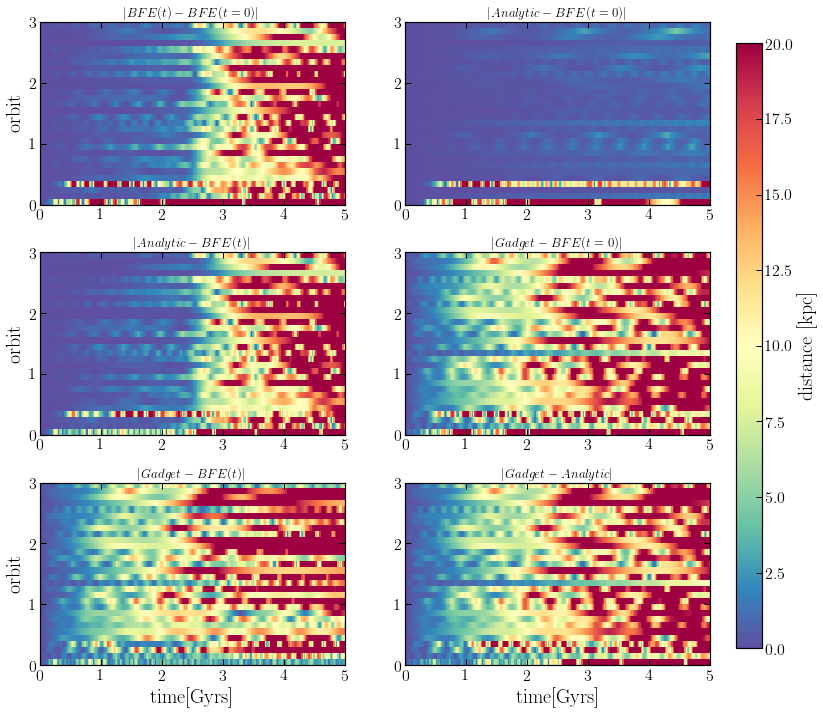

In [305]:
fig, ax = plt.subplots(3, 2, figsize=(12, 12))
im=ax[0][0].imshow((dist_orbits), origin='lower', cmap='Spectral_r', vmin=0, vmax=20, extent=[0, 5, 0, 3])
ax[0][1].imshow((dist_orbits_bfe_teo), origin='lower', cmap='Spectral_r', vmin=0, vmax=20, extent=[0, 5, 0, 3])
ax[1][0].imshow((dist_orbits_bfet_teo), origin='lower', cmap='Spectral_r', vmin=0, vmax=20, extent=[0, 5, 0, 3])
ax[1][1].imshow((dist_orbits_bfe_g), origin='lower', cmap='Spectral_r', vmin=0, vmax=20, extent=[0, 5, 0, 3])
ax[2][0].imshow((dist_orbits_bfet_g), origin='lower', cmap='Spectral_r', vmin=0, vmax=20, extent=[0, 5, 0, 3])
ax[2][1].imshow((dist_orbits_teo_g), origin='lower', cmap='Spectral_r', vmin=0, vmax=20, extent=[0, 5, 0, 3])

ax[0][0].set_title(r'$|BFE(t)-BFE(t=0)|$', fontsize=13)
ax[0][1].set_title(r'$|Analytic-BFE(t=0)|$', fontsize=13)
ax[1][0].set_title(r'$|Analytic-BFE(t)|$', fontsize=13)
ax[1][1].set_title(r'$|Gadget-BFE(t=0)|$', fontsize=13)
ax[2][0].set_title(r'$|Gadget-BFE(t)|$', fontsize=13)
ax[2][1].set_title(r'$|Gadget-Analytic|$', fontsize=13)

cbar_ax = fig.add_axes([0.93, 0.15, 0.03, 0.7])
cbar = fig.colorbar(im, cax=cbar_ax)
cbar.set_label(r'$\rm{distance\ [kpc]}$')
ax[2][0].set_xlabel(r'$\rm{time [Gyrs]}$')
ax[2][1].set_xlabel(r'$\rm{time [Gyrs]}$')

ax[2][0].set_ylabel(r'$\rm{orbit}$')
ax[1][0].set_ylabel(r'$\rm{orbit}$')
ax[0][0].set_ylabel(r'$\rm{orbit}$')

savefig('high_res_MW_halo_all_orbits.pdf', bbox_inches='tight')

In [40]:
plot(np.sqrt(np.sum(orbit_halo_t0.xyz**2, axis=0)), label='BFE(static)')
plot(np.sqrt(np.sum(orbit_halo_t.xyz**2, axis=0)), label='BFE(t)')
plot(np.sqrt(np.sum(orbit_halo_teo.xyz**2, axis=0)), label='Analytic')
plot(np.sqrt(np.sum(xyz_all**2, axis=1)), label='Gadget')
#plot(np.sqrt(np.sum((xyz_all-rcom_all)**2, axis=1)), label='Gadget')

legend()

NameError: name 'orbit_halo_t0' is not defined

In [620]:
## integrating orbit ensamble

In [874]:
w0.x10

<Quantity [-14.95599365,   2.48945165,  -5.0269227 ] kpc>

In [864]:
shape(orbit_halo_t.xyz[101,:,2])

(251,)

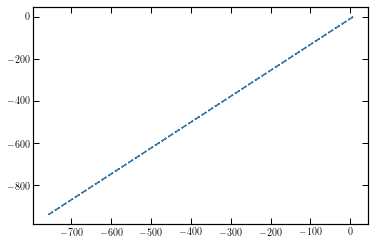

In [858]:
i=10
plot(orbit_halo_t0.xyz[i,:,0].value, orbit_halo_t0.xyz[i,:,1].value, ls=':', c='k')
plot(orbit_halo_t.xyz[i,:,0].value, orbit_halo_t.xyz[i,:,1].value, ls='--', c='C0')

#plot(orbit_halo_t.x.value, orbit_halo_t.y.value, ls='--', c='k')

#scatter(orbit_halo_t0.x[0], orbit_halo_t0.y[0])
#plot(xyz_all[:,0]-rcom_all[:,0], xyz_all[:,1]-rcom_all[:,1])

#plot(xyz_all[:,0], xyz_all[:,1])

#scatter(xyz_all[0,0], xyz_all[0,1], c='C1')

In [36]:
plot(orbit_halo_t0.x.value, orbit_halo_t0.z.value, ls=':', c='k')
plot(orbit_halo_t.x.value, orbit_halo_t.z.value, ls='--', c='k')

#scatter(orbit_halo_t0.x[0], orbit_halo_t0.y[0])
plot(xyz_all[:,0]-rcom_all[:,0], xyz_all[:,2]-rcom_all[:,2])

#plot(xyz_all[:,0], xyz_all[:,1])

#scatter(xyz_all[0,0], xyz_all[0,1], c='C1')

NameError: name 'orbit_halo_t0' is not defined

In [842]:
def orbits_dif(orb1, orb2, npart, tarray):
    dif_all = np.zeros((npart, tarray))
    for i in range(npart):
        #print(i)
        dif_all[i] = np.sqrt(np.sum((orb1[i]-orb2[i])**2, axis=1))
    return dif_all

In [843]:
shape(orbit_halo_t0.xyz.value[190])

(251, 3)

In [844]:
orbits_distance_bfes = orbits_dif(orbit_halo_t0.xyz.value, orbit_halo_t.xyz.value, 191, 251)
orbits_distance_bfe_teo = orbits_dif(orbit_halo_t0.xyz.value, orbit_halo_teo.xyz.value, 191, 251)

In [850]:
np.shape(orbits_distance_bfe_teo)

(191, 251)

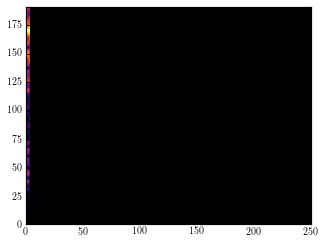

In [851]:
imshow((orbits_distance_bfe_teo.T), extent=[0, 251, 0, 191], origin='lower', cmap='inferno')

In [677]:
shape(np.sum((orbit_halo_t0.xyz.value.T-orbit_halo_t.xyz.value.T)**2, axis=0))

(251, 3)

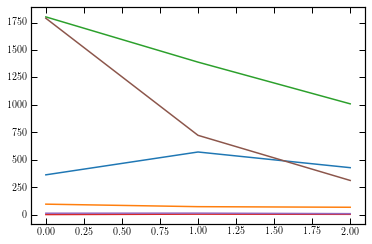

In [669]:
plot(orbits_distance)

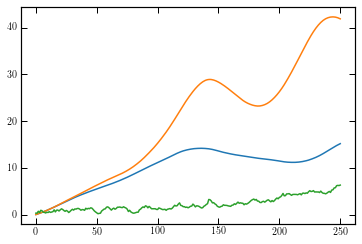

In [613]:
plot(np.sqrt(np.sum((orbit_halo_t0.xyz.value.T-xyz_all)**2, axis=1)))
plot(np.sqrt(np.sum((orbit_halo_t.xyz.value.T-xyz_all)**2, axis=1)))
plot(np.sqrt(np.sum((rcom_all)**2, axis=1)))

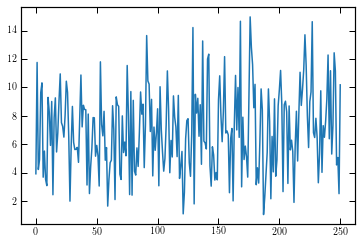

In [614]:
plot(np.sqrt(np.sum((vcom_all)**2, axis=1)))